# Tugas 2 Deep Learning - Classification - LSTM VERSION

### Kelompok 3
- Muhammad Alvinza (2304879)
- Muhammad Ichsan Khairullah (2306924)
- Abdurrahman Rauf Budiman (2301102)
- Rasendriya Andhika (2305309)

## Pendahuluan

Pada Tugas 2 ini, kelompok kami diberikan tantangan untuk membangun model klasifikasi sentimen berbasis Long Short-Term Memory (LSTM) menggunakan framework TensorFlow. Model ini dirancang dengan arsitektur neural network yang memanfaatkan Long Short-Term Memory (LSTM) sebagai komponen utama untuk memproses sequence data berupa teks review dan mengklasifikasikan sentimen menjadi positif atau negatif. Pengerjaan tugas ini bertujuan sebagai pengenalan terhadap konsep LSTM yang mampu mengolah data berurutan (sequential data) seperti teks dengan kemampuan menangani long-term dependencies dalam analisis sentimen.

Dataset yang digunakan pada proyek ini merupakan kumpulan review beserta rating (1-5) yang merepresentasikan opini dan penilaian pengguna terhadap suatu produk atau layanan. Setiap review diproses melalui tahap data cleaning yang komprehensif termasuk konversi ke lowercase, penanganan emoticon menjadi representasi teks, penghapusan URL dan mention, serta filtering review yang terlalu pendek. Rating kemudian dikonversi menjadi label binary dimana rating 1-3 dikategorikan sebagai sentimen negatif (0) dan rating 4-5 sebagai sentimen positif (1). Dataset kemudian dibagi menjadi data pelatihan, validasi, dan testing untuk mengevaluasi kemampuan model dalam mempelajari pola sentimen dan menghasilkan prediksi yang akurat.

Dalam proses pelatihan, kami mengimplementasikan arsitektur LSTM dengan embedding layer untuk representasi kata, LSTM units dengan dropout untuk regularisasi, dan dense layers untuk klasifikasi binary. Model dikompilasi dengan Adam optimizer dan binary crossentropy loss function, dengan training dilakukan menggunakan Early Stopping untuk mencegah overfitting. Proses tokenisasi mengubah teks menjadi sequence numerik dengan vocabulary terbatas dan padding untuk menyamakan panjang input. Setelah model dilatih, dilakukan evaluasi menggunakan classification report, confusion matrix, dan visualisasi training history untuk menganalisis performa model.

Dengan demikian, tujuan dari tugas ini adalah untuk membangun sebuah model klasifikasi sentimen berbasis LSTM yang mampu menganalisis polaritas emosi dalam teks secara otomatis, sekaligus memahami konsep dasar penerapan jaringan saraf tiruan berulang pada bidang Natural Language Processing (NLP) dan sentiment analysis menggunakan TensorFlow.

## Import Dataset dan Library

### Import Libraries

Pada tugas kali ini, kami akan menggunakan beberapa library dengan fungsi sebagai berikut:

1. **`re`**  
   → Untuk *regular expression*, digunakan dalam pembersihan teks (misalnya menghapus simbol atau karakter tertentu).

2. **`numpy (np)`**  
   → Digunakan untuk komputasi numerik dan manipulasi array.

3. **`pandas (pd)`**  
   → Untuk membaca, mengelola, dan memproses dataset dalam bentuk *DataFrame*.

4. **`train_test_split`** *(dari `sklearn.model_selection`)*  
   → Membagi dataset menjadi *training set* dan *testing/validation set*.

5. **`classification_report, confusion_matrix`** *(dari `sklearn.metrics`)*  
   → Untuk evaluasi performa model dengan laporan klasifikasi dan confusion matrix.

6. **`Tokenizer`** *(dari `tensorflow.keras.preprocessing.text`)*  
   → Mengubah teks menjadi urutan angka (*token*) agar bisa diproses oleh model neural network.

7. **`pad_sequences`** *(dari `tensorflow.keras.preprocessing.sequence`)*  
   → Menyamakan panjang urutan token supaya dimensi input konsisten.

8. **`Sequential`** *(dari `tensorflow.keras.models`)*  
   → Untuk membangun model neural network secara berurutan layer demi layer.

9. **Lapisan-lapisan dari `tensorflow.keras.layers`**  
   - **`Input`** → Mendefinisikan bentuk dan ukuran data input.  
   - **`Embedding`** → Mengubah token menjadi vektor representasi numerik.  
   - **`Dense`** → Lapisan *fully-connected* untuk menghasilkan output akhir.
   - **`LSTM`** → Lapisan *Long Short-Term Memory* untuk menangani dependensi jangka panjang dalam data berurutan.
   - **`Dropout`** → Teknik regularisasi dengan menonaktifkan sebagian neuron secara acak selama pelatihan untuk mencegah overfitting.
   
10. **`Adam`** *(dari `tensorflow.keras.optimizers`)*  
    → Optimizer adaptif untuk mempercepat dan menstabilkan proses pelatihan model.

11. **`EarlyStopping`** *(dari `tensorflow.keras.callbacks`)*  
    → Menghentikan pelatihan otomatis jika performa model tidak meningkat lagi (*mencegah overfitting*).

12. **`pickle`**  
    → Untuk menyimpan dan memuat objek Python (tokenizer dan konfigurasi model).

In [ ]:
# Import required libraries
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, SimpleRNN, Bidirectional, Dense, Dropout, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Layer, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 1.26.4


## Load Dataset

**Tujuan**: Memuat dataset review yang akan digunakan untuk training model sentiment analysis.

**Step yang dilakukan**:
1. Membaca file CSV menggunakan `pd.read_csv()` dari folder Dataset
2. Menampilkan 5 baris pertama dengan `df.head()` untuk melihat struktur data

**Mengapa langkah ini penting**:
- Dataset berisi review teks dan rating numerik (1-5) yang akan menjadi dasar pembelajaran model
- Kita perlu memahami struktur dan format data sebelum melakukan preprocessing
- Mengetahui kolom-kolom yang tersedia dan tipe datanya untuk langkah selanjutnya

In [50]:
df = pd.read_csv("reviews.csv")
df.head()


,date,review,rating,thumbs_up,version
0,2021-09-30 06:12:53,"Udah di coba, keren dan responsive, dengan tam...",5,36,1.0.0
1,2021-09-30 06:33:15,Excellent,5,0,1.0.0
2,2021-09-30 06:48:30,Keren. Cakep benar semakin canggih. Terdepan t...,5,22,1.0.0
3,2021-09-30 06:56:05,mantap,5,0,NaN
4,2021-09-30 07:02:21,Mantap,5,0,1.0.0


## Exploratory Data Analysis (EDA)

**Tujuan**: Memahami karakteristik, distribusi, dan kualitas dataset sebelum melakukan preprocessing.

**Analisis yang akan dilakukan**:
1. **Dataset Overview**: Bentuk data, kolom, dan tipe data
2. **Missing Values**: Identifikasi data yang hilang
3. **Rating Distribution**: Distribusi rating 1-5
4. **Text Statistics**: Panjang review, kata-kata yang sering muncul
5. **Data Quality**: Duplikasi dan outliers
6. **Sample Analysis**: Contoh review untuk setiap rating

**Mengapa EDA penting**:
- **Understanding data**: Mengenal karakteristik dataset sebelum modeling
- **Data quality**: Mengidentifikasi masalah yang perlu diperbaiki
- **Feature engineering**: Insights untuk preprocessing dan feature selection
- **Model strategy**: Menentukan approach yang tepat berdasarkan distribusi data

In [51]:
print("INFORMASI DASAR DATASET")
print("=" * 50)
print(f"Jumlah baris: {df.shape[0]:,}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Ukuran dataset: {df.shape}")
plt.tight_layout()
plt.show()

INFORMASI DASAR DATASET
Jumlah baris: 155,192
Jumlah kolom: 5
Ukuran dataset: (155192, 5)


<Figure size 640x480 with 0 Axes>

## Prepare Data

**Tujuan**: Menyiapkan data dengan mengambil kolom yang relevan dan membersihkan missing values.

**Step yang dilakukan**:
1. **Seleksi kolom**: Hanya mengambil kolom `review` (teks) dan `rating` (target) menggunakan `df[['review', 'rating']].copy()`
2. **Cek missing values**: Menggunakan `df_clean.isnull().sum()` untuk mengidentifikasi data kosong
3. **Hapus missing values**: Menggunakan `dropna()` untuk menghilangkan baris dengan data kosong
4. **Verifikasi**: Menampilkan jumlah data sebelum dan sesudah cleaning

**Mengapa langkah ini penting**:
- **Fokus pada data relevan**: Kolom lain tidak diperlukan untuk sentiment analysis
- **Kualitas data**: Missing values bisa menyebabkan error saat training dan menurunkan performa model
- **Konsistensi**: Semua data harus lengkap agar model bisa belajar dengan optimal
- **Memory efficiency**: Mengurangi ukuran dataset dengan hanya menyimpan kolom yang dibutuhkan

In [52]:
# Membersihkan data - hanya ambil kolom Sentiment dan Text Tweet
# Text Tweet sebagai X (fitur), Sentiment sebagai Y (target)
df_clean = df[['review', 'rating']].copy()

# Cek data yang hilang
print("Data yang hilang:")
print(df_clean.isnull().sum())
print(f"\nJumlah data sebelum pembersihan: {len(df)}")

# Hapus data yang memiliki nilai kosong
df_clean = df_clean.dropna()
print(f"Jumlah data setelah pembersihan: {len(df_clean)}")
df_clean.head()

Data yang hilang:
review    0
rating    0
dtype: int64

Jumlah data sebelum pembersihan: 155192
Jumlah data setelah pembersihan: 155192


,review,rating
0,"Udah di coba, keren dan responsive, dengan tam...",5
1,Excellent,5
2,Keren. Cakep benar semakin canggih. Terdepan t...,5
3,mantap,5
4,Mantap,5


In [53]:
print(df_clean['rating'].value_counts().sort_index())

rating
1    39183
2     9379
3     9464
4    10951
5    86215
Name: count, dtype: int64


## Convert Rating ke Sentiment Binary

**Tujuan**: Mengubah masalah multiclass (rating 1-5) menjadi binary classification (positif/negatif).

**Step yang dilakukan**:
1. **Definisi fungsi**: Membuat `rating_to_sentiment()` yang memetakan:
   - Rating 1-3 → Sentiment Negatif (0) 
   - Rating 4-5 → Sentiment Positif (1)
2. **Apply mapping**: Menggunakan `df_clean['rating'].apply()` untuk menerapkan fungsi ke semua data
3. **Verifikasi hasil**: Menampilkan distribusi mapping dan contoh data

**Mengapa langkah ini penting**:
- **Simplifikasi problem**: Binary classification lebih mudah dipelajari model daripada multiclass
- **Interpretabilitas**: Hasil lebih mudah diinterpretasi (positif vs negatif) dibanding 5 kelas rating
- **Balance dataset**: Mengurangi kemungkinan class imbalance yang ekstrem
- **Fokus sentiment**: Kita lebih tertarik pada polaritas emosi daripada tingkat rating spesifik
- **Performa model**: Binary classification umumnya memiliki akurasi yang lebih tinggi

In [54]:
def rating_to_sentiment(rating):
    """
    Convert rating (1-5) to binary sentiment
    1-3: Negative (0)
    4-5: Positive (1)
    """
    if rating <= 3:
        return 0  # Negative
    else:
        return 1  # Positive

In [55]:
# Apply mapping
df_clean['Sentiment'] = df_clean['rating'].apply(rating_to_sentiment)

# Verifikasi hasil mapping
print("\nMapping Results:")
print(df_clean[['rating', 'Sentiment']].value_counts().sort_index())

print("\nNew Sentiment Distribution:")
sentiment_counts = df_clean['Sentiment'].value_counts()
print(f"Negative (0): {sentiment_counts.get(0, 0)} ({sentiment_counts.get(0, 0)/len(df_clean)*100:.1f}%)")
print(f"Positive (1): {sentiment_counts.get(1, 0)} ({sentiment_counts.get(1, 0)/len(df_clean)*100:.1f}%)")

# Show sample
print("\nSample Data:")
print(df_clean[['review', 'rating', 'Sentiment']].head(10))


Mapping Results:
rating  Sentiment
1       0            39183
2       0             9379
3       0             9464
4       1            10951
5       1            86215
Name: count, dtype: int64

New Sentiment Distribution:
Negative (0): 58026 (37.4%)
Positive (1): 97166 (62.6%)

Sample Data:
                                              review  rating  Sentiment
0  Udah di coba, keren dan responsive, dengan tam...       5          1
1                                          Excellent       5          1
2  Keren. Cakep benar semakin canggih. Terdepan t...       5          1
3                                             mantap       5          1
4                                             Mantap       5          1
5  mantap jiwa dan raga... ayo kita livinkan indo...       5          1
6                              Mandiri emang terbaik       5          1
7                                        Super App 👍       5          1
8                                          Nice apps    

## Text Cleaning

**Tujuan**: Membersihkan dan menormalisasi teks agar model dapat memproses dengan optimal.

**Step yang dilakukan**:
1. **Lowercase conversion**: Mengubah semua huruf menjadi kecil menggunakan `str.lower()`
2. **Emoticon handling**: Mengkonversi emoticon (`:)`, `:(`, dll.) menjadi kata sentiment ("happy", "sad")
3. **Remove noise**: Menghapus URL, mentions (@username), hashtags (#tag), dan angka
4. **Character normalization**: Mengurangi karakter berulang (contoh: "goooood" → "good")
5. **Text cleaning**: Hanya menyimpan huruf dan spasi, menghapus karakter khusus
6. **Length filtering**: Menghapus review dengan kurang dari 3 kata
7. **Statistical analysis**: Menampilkan statistik vocabulary, panjang kalimat, dan distribusi data

**Mengapa setiap step penting**:
- **Lowercase**: Menghindari duplikasi kata ("Good" vs "good" dianggap sama)
- **Emoticon handling**: Emoticon mengandung informasi sentiment yang berharga
- **Remove noise**: URL dan mention tidak relevan untuk sentiment, bisa mengganggu pembelajaran
- **Character normalization**: Mengurangi variasi kata yang tidak perlu
- **Text cleaning**: Standardisasi format teks untuk konsistensi input
- **Length filtering**: Review terlalu pendek tidak memiliki konteks yang cukup untuk analisis sentiment
- **Statistical analysis**: Membantu menentukan parameter optimal untuk model (MAX_LEN, MAX_WORDS)

**Output yang dihasilkan**:
- Teks yang bersih dan konsisten
- Statistik vocabulary size dan distribusi panjang kalimat
- Rekomendasi parameter untuk tokenisasi

In [56]:
print("Starting data cleaning process...")
print(f"Data sebelum cleaning: {len(df_clean)} reviews")

# 1. Convert to lowercase
df_clean['review_clean'] = df_clean['review'].str.lower()

# 2. Remove special characters, numbers, and extra whitespaces using regex
import re

def clean_text(text):
    if pd.isna(text):
        return ""
    
    # Dictionary untuk emoticon handling - convert to sentiment words
    emoticon_dict = {
        # Happy variations
        ':)': 'positive', ':-)': 'positive', '=)': 'positive', ':]': 'positive',
        ':D': 'very positive', ':-D': 'very positive', '=D': 'very positive', 'XD': 'very positive',
        '^_^': 'positive', '^-^': 'positive', ':P': 'playful', ':-P': 'playful',
        
        # Sad variations  
        ':(': 'negative', ':-(': 'negative', '=(': 'negative', ':[': 'negative',
        ":'(": 'very negative', ":'-(" : 'very negative', 'T_T': 'very negative', 'T.T': 'very negative',
        
        # Love/Heart
        '<3': 'love', '</3': 'disappointed', '<33': 'love', '<333': 'love',
        
        # Neutral/Other
        ':|': 'neutral', ':-|': 'neutral', '=|': 'neutral',
        ';)': 'positive', ';-)': 'positive', ';P': 'playful',
        ':o': 'surprised', ':O': 'surprised', 'O_O': 'surprised',
        ':*': 'affection', ':-*': 'affection', 'xoxo': 'affection'
    }
    
    # Replace emoticons dengan sentiment words
    for emoticon, sentiment in emoticon_dict.items():
        text = text.replace(emoticon, f' {sentiment} ')
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions (@username) and hashtags (#hashtag)
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Replace repeated characters (3 or more) with two characters
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    
    # Remove special characters and punctuation (keep only alphabets and spaces)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply text cleaning
df_clean['review_clean'] = df_clean['review_clean'].apply(clean_text)

# 3. Remove reviews that are too short (less than 3 words)
# Count words in each review
df_clean['word_count'] = df_clean['review_clean'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

print(f"\nWord count statistics before filtering:")
print(f"Mean words per review: {df_clean['word_count'].mean():.1f}")
print(f"Median words per review: {df_clean['word_count'].median():.1f}")
print(f"Min words: {df_clean['word_count'].min()}")
print(f"Max words: {df_clean['word_count'].max()}")

# Set minimum word count (keeping reviews with at least 3 words)
MIN_WORDS = 3
df_before_filter = len(df_clean)
df_clean = df_clean[df_clean['word_count'] >= MIN_WORDS].copy()

print(f"\nFiltering reviews with less than {MIN_WORDS} words:")
print(f"Reviews removed: {df_before_filter - len(df_clean)}")
print(f"Remaining reviews: {len(df_clean)}")
print(f"Data retention: {len(df_clean)/df_before_filter*100:.1f}%")

# 4. Remove empty reviews after cleaning
df_clean = df_clean[df_clean['review_clean'].str.strip() != ''].copy()
    

Starting data cleaning process...
Data sebelum cleaning: 155192 reviews

Word count statistics before filtering:
Mean words per review: 8.9
Median words per review: 5.0
Min words: 0
Max words: 100

Filtering reviews with less than 3 words:
Reviews removed: 56289
Remaining reviews: 98903
Data retention: 63.7%


In [57]:
print(f"Final cleaning results:")
print(f"Final data count: {len(df_clean)} reviews")
print(f"Average words per review: {df_clean['word_count'].mean():.1f}")

# Check sentiment distribution after cleaning
print(f"\nSentiment distribution after cleaning:")
sentiment_counts_clean = df_clean['Sentiment'].value_counts()
print(f"Negative (0): {sentiment_counts_clean.get(0, 0)} ({sentiment_counts_clean.get(0, 0)/len(df_clean)*100:.1f}%)")
print(f"Positive (1): {sentiment_counts_clean.get(1, 0)} ({sentiment_counts_clean.get(1, 0)/len(df_clean)*100:.1f}%)")

# Show sample cleaned data
print(f"\nSample cleaned data:")
sample_df = df_clean[['review', 'review_clean', 'word_count', 'rating', 'Sentiment']].head()
for idx, row in sample_df.iterrows():
    print(f"\nOriginal: {row['review'][:100]}...")
    print(f"Cleaned:  {row['review_clean'][:100]}...")
    print(f"Words: {row['word_count']}, Rating: {row['rating']}, Sentiment: {row['Sentiment']}")

# ============================================

print("\nAnalisis Data Setelah Cleaning:")

# 1. Vocabulary Analysis
all_words = []
for review in df_clean['review_clean']:
    if isinstance(review, str):
        all_words.extend(review.split())

vocab_size = len(set(all_words))
sentence_lengths = df_clean['word_count'].values

# 2. Summary Statistics
print(f"Total kata unik: {vocab_size:,}")
print(f"Panjang rata-rata: {sentence_lengths.mean():.1f} kata")
print(f"Panjang maksimum: {sentence_lengths.max()} kata")

# 3. Recommended LSTM Parameters
recommended_max_len = int(np.percentile(sentence_lengths, 95))
print(f"MAX_LEN yang disarankan: {recommended_max_len}")
print(f"MAX_WORDS yang disarankan: {min(vocab_size, 10000):,}")

# 4. Data Balance Check
sentiment_counts = df_clean['Sentiment'].value_counts()
imbalance_ratio = sentiment_counts.max() / sentiment_counts.min()
print(f"Rasio keseimbangan data: {imbalance_ratio:.2f}:1", 
      "[BAIK]" if imbalance_ratio <= 1.5 else "[PERLU PERHATIAN]")

# Drop the word_count column as it's no longer needed
df_clean = df_clean.drop('word_count', axis=1)

Final cleaning results:
Final data count: 98903 reviews
Average words per review: 13.2

Sentiment distribution after cleaning:
Negative (0): 53158 (53.7%)
Positive (1): 45745 (46.3%)

Sample cleaned data:

Original: Udah di coba, keren dan responsive, dengan tampilan yang makin segar pastinya!...
Cleaned:  udah di coba keren dan responsive dengan tampilan yang makin segar pastinya...
Words: 12, Rating: 5, Sentiment: 1

Original: Keren. Cakep benar semakin canggih. Terdepan terpercaya tumbuh bersama anda....
Cleaned:  keren cakep benar semakin canggih terdepan terpercaya tumbuh bersama anda...
Words: 10, Rating: 5, Sentiment: 1

Original: mantap jiwa dan raga... ayo kita livinkan indonesia...
Cleaned:  mantap jiwa dan raga ayo kita livinkan indonesia...
Words: 8, Rating: 5, Sentiment: 1

Original: Mandiri emang terbaik...
Cleaned:  mandiri emang terbaik...
Words: 3, Rating: 5, Sentiment: 1

Original: Livin semakin canggih, Mantap Jiwa Me-livin-kan indonesia...
Cleaned:  livin semakin ca

## Split Data - Pembagian Dataset

**Tujuan**: Membagi dataset menjadi train, validation, dan test set untuk evaluasi model yang proper.

**Step yang dilakukan**:
1. **First split**: 80% training, 20% temporary (menggunakan `train_test_split`)
2. **Second split**: Membagi 20% temporary menjadi 10% validation dan 10% test
3. **Stratification**: Menggunakan parameter `stratify=y` untuk mempertahankan proporsi kelas

**Pembagian final**:
- **Train (80%)**: Untuk melatih model, mempelajari pola dan weight
- **Validation (10%)**: Untuk monitoring training dan tuning hyperparameter  
- **Test (10%)**: Untuk evaluasi final performa model

**Mengapa pembagian ini penting**:
- **Train set**: Model belajar dari data ini, semakin banyak semakin baik (dengan syarat tidak overfitting)
- **Validation set**: Mencegah overfitting dengan monitoring performa pada data yang tidak dilatih
- **Test set**: Memberikan estimasi performa real-world yang tidak bias
- **Stratification**: Memastikan proporsi positif/negatif sama di semua split, mencegah bias
- **Separate test**: Test set benar-benar "unseen" oleh model selama training dan validation

**Best practice**: Test set tidak boleh dilihat sama sekali sampai evaluasi final!

In [58]:
# Membuat variabel X dan Y untuk model LSTM
# X = Text Tweet yang sudah dibersihkan (review_clean)
# Y = Sentiment
X = df_clean['review_clean'].values  # Menggunakan review yang sudah dibersihkan
y = df_clean['Sentiment'].values

print(f"Data untuk training:")
print(f"Jumlah samples: {len(X)}")
print(f"Contoh X (review cleaned): {X[0]}")
print(f"Contoh Y (sentiment): {y[0]}")

Data untuk training:
Jumlah samples: 98903
Contoh X (review cleaned): udah di coba keren dan responsive dengan tampilan yang makin segar pastinya
Contoh Y (sentiment): 1


In [59]:

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,  # 50% dari 20% = 10% total
    random_state=42,
    stratify=y_temp
)


## Tokenization & Padding - Konversi Teks ke Numerik

**Tujuan**: Mengubah teks menjadi format numerik yang dapat diproses oleh neural network.

**Step yang dilakukan**:
1. **Tokenizer initialization**: 
   - `MAX_WORDS = 10000`: Membatasi vocabulary hanya 10,000 kata paling frequent
   - `oov_token='<OOV>'`: Token khusus untuk kata yang tidak dikenal
2. **Vocabulary building**: `tokenizer.fit_on_texts(X_train)` - hanya dari training data
3. **Text to sequences**: Mengubah setiap review menjadi list integer
4. **Padding**: `pad_sequences()` dengan `maxlen=40` untuk menyamakan panjang semua sequence

**Parameter yang dipilih**:
- **MAX_WORDS = 10000**: Balance antara coverage vocabulary dan efficiency
- **MAX_LEN = 40**: Berdasarkan analisis statistik (95th percentile panjang review)
- **padding='post'**: Menambahkan zeros di akhir sequence

**Mengapa setiap step penting**:
- **Vocabulary limitation**: Mencegah overfitting dan mengurangi computational cost
- **OOV handling**: Kata baru yang tidak ada di vocabulary tetap bisa diproses
- **Train-only fitting**: Mencegah data leakage dari validation/test set
- **Sequence conversion**: Neural network hanya bisa memproses angka, bukan teks
- **Padding**: LSTM membutuhkan input dengan dimensi yang konsisten
- **Post padding**: Lebih natural karena informasi penting biasanya di awal kalimat

**Output**: Array numerik 2D dengan shape (n_samples, 40) yang siap untuk training.

In [60]:
MAX_WORDS = 10000
MAX_LEN = 40

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)  # Hanya dari TRAIN!

# Tokenize semua split
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_LEN, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post')

print(f"Train shape: {X_train_pad.shape}")
print(f"Val shape: {X_val_pad.shape}")
print(f"Test shape: {X_test_pad.shape}")

Train shape: (79122, 40)
Val shape: (9890, 40)
Test shape: (9891, 40)


In [61]:
print(np.unique(y_train))  # Harus output: [0 1]
print(y_train.shape)       # Harus (13304,) bukan (13304, 1)

[0 1]
(79122,)


## RNN

### Build Model

In [ ]:
model = Sequential([
    Input(shape=(MAX_LEN,)),
    Embedding(input_dim=MAX_WORDS, output_dim=32),
    SimpleRNN(32, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),  # Kurangi ke 32, tambah dropout
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

### Training Model

In [ ]:
# # ============================================
# # TRAIN MODEL
# # ============================================

# print("\nTraining model...")

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# # reduce_lr = ReduceLROnPlateau(
# #     monitor='val_loss',
# #     factor=0.5,
# #     patience=3,
# #     min_lr=1e-7,
# #     verbose=1
# # )

history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_pad, y_val),  # ← Pakai VAL, bukan TEST!
    verbose=1,
    callbacks=[early_stop]
)

### Evaluating Model

In [ ]:
print("\nEvaluating model...")
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

y_pred = (model.predict(X_test_pad) > 0.5).astype(int).flatten()
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

### Save Model

In [ ]:
# Create models directory if not exists
models_dir = Path("../models")
models_dir.mkdir(exist_ok=True)

# 1. Save model (Keras format .keras - recommended)
model_path = models_dir / "rnn_sentiment_model.keras"
model.save(model_path)
print(f"Model saved: {model_path}")

# 2. Save tokenizer
tokenizer_path = models_dir / "tokenizer_rnn.pkl"
with open(tokenizer_path, 'wb') as f:
    pickle.dump(tokenizer, f)
print(f"Tokenizer saved: {tokenizer_path}")

# 3. Save hyperparameters
config = {
    'MAX_WORDS': MAX_WORDS,
    'MAX_LEN': MAX_LEN,
    'vocab_size': len(tokenizer.word_index)
}

config_path = models_dir / "config_rnn.pkl"
with open(config_path, 'wb') as f:
    pickle.dump(config, f)
print(f"Config saved: {config_path}")

In [ ]:
import matplotlib.pyplot as plt
# Plot/visualisasi akurasi & loss training & validation
plt.figure(figsize=(12, 5))
# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## LSTM

### Build Model

In [ ]:
model = Sequential([
    Input(shape=(MAX_LEN,)),
    Embedding(input_dim=MAX_WORDS, output_dim=32),
    LSTM(32, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),  # Kurangi ke 32, tambah dropout
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

### Training Model

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=3,
#     min_lr=1e-7,
#     verbose=1
# )

history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_pad, y_val),  # ← Pakai VAL, bukan TEST!
    verbose=1,
    callbacks=[early_stop]
)

### Evaluating Model

In [ ]:
print("\nEvaluating model...")
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

y_pred = (model.predict(X_test_pad) > 0.5).astype(int).flatten()
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


### Save Model

In [ ]:
# Create models directory if not exists
models_dir = Path("../models")
models_dir.mkdir(exist_ok=True)

# 1. Save model (Keras format .keras - recommended)
model_path = models_dir / "lstm_sentiment_model.keras"
model.save(model_path)
print(f"Model saved: {model_path}")

# 2. Save tokenizer
tokenizer_path = models_dir / "tokenizer_lstm.pkl"
with open(tokenizer_path, 'wb') as f:
    pickle.dump(tokenizer, f)
print(f"Tokenizer saved: {tokenizer_path}")

# 3. Save hyperparameters
config = {
    'MAX_WORDS': MAX_WORDS,
    'MAX_LEN': MAX_LEN,
    'vocab_size': len(tokenizer.word_index)
}

config_path = models_dir / "config_lstm.pkl"
with open(config_path, 'wb') as f:
    pickle.dump(config, f)
print(f"Config saved: {config_path}")

## Transformer

Tujuan: Membangun model klasifikasi sentimen berbasis arsitektur Transformer (encoder-only) untuk memahami konteks (sentimen) kalimat melalui mekanisme self-attention.  

### PositionalEmbedding Layer
Menggabungkan dua jenis embedding:

Token Embedding: Mengubah token kata (misal, 10000 kata) menjadi vektor dense 64 dimensi (representasi semantik).

Positional Embedding: Menambahkan vektor 64 dimensi yang merepresentasikan posisi (0-39) dari setiap kata dalam sequence.

Outputnya adalah penjumlahan dari kedua embedding tersebut ([B, L, D]).  
- B = Batch Size (328)
- L = Length, panjang komentar (40)  
- D = Dimensi vektor (64)

In [62]:
class PositionalEmbedding(tf.keras.layers.Layer): # Menggabungkan embedding token dan embedding posisi
    def __init__(self, vocab_size, max_len, embed_dim, mask_zero=True):
        super().__init__()
        self.token_emb = Embedding(vocab_size, embed_dim, mask_zero=mask_zero) # Mengubah vektorisasi kata, jadi vektor D-dimensi. Misal Ada = 24. 24 = [0.1, 0.9, ...]
        self.pos_emb = Embedding(max_len, embed_dim) # Mendapatkan vektor posisi 

    def call(self, x):
        length = tf.shape(x)[-1] # mengambil panjang sekuens (panjang si komentar)
        positions = tf.range(start=0, limit=length, delta=1) # Membuat tensor berisi ID posisi: [0, 1, 2, ..., 39]
        pos = self.pos_emb(positions)             # [L, D]
        x = self.token_emb(x)                    # [B, L, D]
        return x + pos                           # broadcast add

    def compute_mask(self, x, mask=None): # Meneruskan mask (informasi tentang padding 0) ke layer selanjutnya.
        return self.token_emb.compute_mask(x)

### TransformerEncoder Layer

Menganalisis kalimat yang sudah di-embed, Lapisan ini membuat setiap kata "sadar-konteks" dengan cara melihat kata-kata lain di sekitarnya (mekanisme self-attention).  
Lapisan ini diulang 2 kali (num_layers=2) untuk membangun representasi yang lebih dalam.  

Setiap encoder terdiri dari:  

- Multi-Head Self-Attention: 4 heads secara paralel menganalisis hubungan antar kata dalam kalimat, menciptakan representasi yang "sadar-konteks".

- Add & Norm 1: Residual connection (penjumlahan input x dengan attn_out) diikuti LayerNormalization. Untuk menstabilkan dan mempercepat pelatihan

- Feed-Forward Network (FFN): Dua lapisan Dense (Dense(128, 'relu') lalu Dense(64)) untuk transformasi tambahan.

- Add & Norm 2: Residual connection lagi (input out1 dengan ffn_out) diikuti LayerNormalization.

- Dropout (rate=0.1) digunakan di dalam encoder untuk regularisasi

In [ ]:
class TransformerEncoder(Layer): # Menganalisis kalimat yang sudah di-embed, Lapisan ini membuat setiap kata "sadar-konteks" dengan cara melihat kata-kata lain di sekitarnya (mekanisme self-attention)
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention( # Menggunakan mekanisme multi-head self-attention, yang memungkinkan model untuk fokus pada berbagai bagian input secara bersamaan.
            num_heads=num_heads, key_dim=embed_dim // num_heads
        )
        self.ffn = tf.keras.Sequential([ # Feed-forward neural network (FFN) yang terdiri dari dua lapisan Dense dengan aktivasi ReLU di antaranya.
            Dense(ff_dim, activation="relu  "),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6) # Layer normalization untuk menstabilkan dan mempercepat pelatihan.
        self.layernorm2 = LayerNormalization(epsilon=1e-6) 
        self.dropout1 = Dropout(rate) # Dropout untuk mencegah overfitting dengan mengacak beberapa neuron selama pelatihan.
        self.dropout2 = Dropout(rate)

    def call(self, x, training=None, mask=None):
        # mask: [B, L] → attn_mask: [B, 1, L] (broadcast ke [B, L, L])
        attn_mask = None
        if mask is not None:
            attn_mask = tf.cast(mask[:, tf.newaxis, :], tf.bool)
        attn_out = self.att(x, x, attention_mask=attn_mask, training=training) # Self-attention: query, key, value semuanya dari x
        attn_out = self.dropout1(attn_out, training=training) # Dropout setelah self-attention
        out1 = self.layernorm1(x + attn_out) # Residual connection + LayerNorm
        ffn_out = self.ffn(out1) # Feed-forward network
        ffn_out = self.dropout2(ffn_out, training=training) # Dropout setelah feed-forward
        return self.layernorm2(out1 + ffn_out) # Residual connection + LayerNorm

    def compute_mask(self, inputs, mask=None):
        return mask

### Setting Model Transformer

In [ ]:
embed_dim = 64 # Dimensi embedding untuk setiap kata
num_heads = 4 # Jumlah "kepala" dalam mekanisme multi-head attention
ff_dim = 128 # Dimensi lapisan feed-forward di dalam encoder
num_layers = 2 # Jumlah lapisan encoder yang ditumpuk, berarti dua kali transformer encoder berturut-turut

model = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32),
    PositionalEmbedding(vocab_size=MAX_WORDS, max_len=MAX_LEN, embed_dim=embed_dim, mask_zero=True),
    # Stack encoder blocks
    *[TransformerEncoder(embed_dim, num_heads, ff_dim, rate=0.1) for _ in range(num_layers)],
    Flatten(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid'),
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ positional_embedding_2          │ (None, 40, 64)         │       642,560 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_4           │ (None, 40, 64)         │        33,472 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_5           │ (None, 40, 64)         │        33,472 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       163,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 873,473 (3.33 MB)

 Trainable params: 873,473 (3.33 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model

**Tujuan**: Melatih model LSTM untuk mempelajari pola sentiment dari data training.

**Konfigurasi training**:
- **Epochs**: 20 maksimal (bisa berhenti lebih awal dengan EarlyStopping)
- **Batch size**: 64 - balance antara memory usage dan gradient stability
- **Validation data**: Menggunakan validation set untuk monitoring
- **Callbacks**: EarlyStopping dengan patience=3

**EarlyStopping mechanism**:
- **Monitor**: `val_loss` - memantau validation loss
- **Patience**: 3 epochs - berhenti jika tidak ada improvement selama 3 epoch berturut-turut
- **Restore best weights**: Mengembalikan weights terbaik saat validation loss terendah

**Proses yang terjadi**:
1. **Forward pass**: Data training diproses melalui network
2. **Loss calculation**: Menghitung error menggunakan binary crossentropy
3. **Backpropagation**: Update weights berdasarkan gradient
4. **Validation**: Evaluasi pada validation set setiap epoch
5. **Early stopping check**: Monitor apakah validation loss masih turun

**Mengapa konfigurasi ini optimal**:
- **Batch size 64**: Cukup besar untuk gradient yang stabil, tidak terlalu besar untuk memory
- **EarlyStopping**: Mencegah overfitting dan menghemat waktu training
- **Validation monitoring**: Memastikan model generalize well ke data unseen
- **Patience=3**: Memberikan kesempatan model untuk recover dari temporary spike

**Expected outcome**: Model yang dapat mengklasifikasi sentiment dengan akurasi tinggi tanpa overfitting.

In [65]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=328,
    validation_data=(X_val_pad, y_val),  # ← Pakai VAL, bukan TEST!
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.8128 - loss: 0.4226 - val_accuracy: 0.8789 - val_loss: 0.3165
Epoch 2/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.8891 - loss: 0.2981 - val_accuracy: 0.8869 - val_loss: 0.2939
Epoch 3/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.8963 - loss: 0.2773 - val_accuracy: 0.8868 - val_loss: 0.3006
Epoch 4/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.9030 - loss: 0.2622 - val_accuracy: 0.8834 - val_loss: 0.2991
Epoch 5/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.9072 - loss: 0.2482 - val_accuracy: 0.8863 - val_loss: 0.3035
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


## Evaluasi Model

**Tujuan**: Mengevaluasi performa model pada test set yang benar-benar unseen untuk mendapatkan estimasi performa real-world.

**Metrik evaluasi yang digunakan**:
1. **Test Accuracy**: Persentase prediksi yang benar dari total prediksi
2. **Test Loss**: Nilai binary crossentropy loss pada test set
3. **Classification Report**: Precision, recall, dan F1-score untuk setiap kelas
4. **Confusion Matrix**: Detail prediksi benar/salah dalam bentuk matriks

**Interpretasi metrik**:
- **Accuracy**: Metrik utama, semakin tinggi semakin baik (target >85%)
- **Precision**: Dari prediksi positif, berapa yang benar-benar positif
- **Recall**: Dari data positif sebenarnya, berapa yang berhasil diprediksi
- **F1-score**: Harmonic mean antara precision dan recall
- **Confusion Matrix**: 
  - True Positive (TP): Prediksi positif yang benar
  - True Negative (TN): Prediksi negatif yang benar  
  - False Positive (FP): Prediksi positif yang salah
  - False Negative (FN): Prediksi negatif yang salah

**Mengapa evaluasi pada test set penting**:
- **Unbiased estimate**: Test set tidak pernah dilihat model selama training/validation
- **Real-world performance**: Menggambarkan performa pada data baru
- **Generalization check**: Memastikan model tidak hanya menghafal training data
- **Model comparison**: Basis untuk membandingkan dengan model lain

**Threshold decision**: Menggunakan 0.5 sebagai threshold untuk mengkonversi probability menjadi binary prediction.

In [66]:
print("\nEvaluating model...")
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

y_pred = (model.predict(X_test_pad) > 0.5).astype(int).flatten()
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Evaluating model...
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8900 - loss: 0.2838
Test Accuracy: 0.8900
Test Loss: 0.2838
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.94      0.90      5316
    positive       0.92      0.84      0.88      4575

    accuracy                           0.89      9891
   macro avg       0.89      0.89      0.89      9891
weighted avg       0.89      0.89      0.89      9891


Confusion Matrix:
[[4979  337]
 [ 751 3824]]


## Save Model - Persistensi untuk Deployment

**Tujuan**: Menyimpan model dan komponen terkait agar dapat digunakan kembali tanpa perlu training ulang.

**Komponen yang disimpan**:
1. **Model file** (`lstm_sentiment_model.keras`):
   - Arsitektur model (layers, connections)
   - Trained weights dan biases
   - Optimizer state dan kompilasi settings
2. **Tokenizer** (`tokenizer_lstm.pkl`):
   - Vocabulary mapping (word → integer)
   - Special tokens (OOV, padding)
   - Preprocessing settings
3. **Configuration** (`config_lstm.pkl`):
   - MAX_WORDS dan MAX_LEN
   - Vocabulary size
   - Hyperparameters penting

**Format file yang dipilih**:
- **Keras format (.keras)**: Format baru yang direkomendasikan, lebih efisien dan komprehensif
- **Pickle (.pkl)**: Standard Python serialization untuk tokenizer dan config

**Mengapa setiap komponen penting**:
- **Model**: Berisi "kecerdasan" yang sudah dipelajari selama training
- **Tokenizer**: Diperlukan untuk preprocessing teks baru dengan vocabulary yang sama
- **Config**: Memastikan konsistensi parameter saat loading model
- **Directory structure**: Organisasi file yang rapi untuk maintenance

**Use case setelah saving**:
- **Production deployment**: Load model untuk prediksi real-time
- **Batch prediction**: Prediksi pada dataset baru
- **Model serving**: Integrasi dengan web service atau API
- **Further training**: Continue training dengan data tambahan

**Best practice**: Selalu save model setelah training yang berhasil untuk menghindari kehilangan progress.

In [ ]:
# Create models directory if not exists
models_dir = Path("models/")
models_dir.mkdir(exist_ok=True)

# 1. Save model (rename for transformer)
model_path = models_dir / "transformer_sentiment_model.keras"
model.save(model_path)
print(f"✅ Model saved: {model_path}")

# 2. Save tokenizer (tetap sama)
tokenizer_path = models_dir / "tokenizer_transformer.pkl"
with open(tokenizer_path, 'wb') as f:
    pickle.dump(tokenizer, f)
print(f"✅ Tokenizer saved: {tokenizer_path}")

# 3. Save hyperparameters
config = {
    'MAX_WORDS': MAX_WORDS,
    'MAX_LEN': MAX_LEN,
    'embed_dim': embed_dim,
    'num_heads': num_heads,
    'ff_dim': ff_dim,
    'num_layers': num_layers,
    'vocab_size': len(tokenizer.word_index)
}
config_path = models_dir / "config_transformer.pkl"
with open(config_path, 'wb') as f:
    pickle.dump(config, f)
print(f"✅ Config saved: {config_path}")

Model saved: models\lstm_sentiment_model.keras
Tokenizer saved: models\tokenizer_lstm.pkl
Config saved: models\config_lstm.pkl


## Memahami Perjalanan Pembelajaran Model

Visualisasi training history adalah jendela yang memungkinkan kita mengintip ke dalam "pikiran" model saat belajar memahami sentimen. Kedua grafik di bawah ini menceritakan kisah yang menarik tentang bagaimana neural network kita secara bertahap menguasai kompleksitas bahasa manusia.

**Kurva Akurasi: Kisah Kemajuan Bertahap**

Perhatikan bagaimana garis akurasi training dan validation bergerak - idealnya, keduanya naik secara konsisten dengan gap yang tidak terlalu besar. Jika garis training naik tajam sementara validation stagnan, itu sinyal bahwa model mulai "menghafal" data training tanpa benar-benar memahami pola umum (overfitting). Sebaliknya, jika keduanya naik bersama, itu pertanda baik bahwa model benar-benar belajar generalisasi yang bermakna.

**Kurva Loss: Refleksi Kepercayaan Diri Model**

Loss function yang turun menunjukkan bagaimana model semakin yakin dengan prediksinya. Yang menarik adalah mengamati *kecepatan* penurunan - penurunan yang terlalu cepat bisa mengindikasikan learning rate yang terlalu tinggi, sementara penurunan yang terlalu lambat mungkin menandakan model perlu lebih banyak waktu atau parameter yang berbeda.

Kombinasi kedua grafik ini memberikan kita insight tentang **sweet spot** dalam training - titik di mana model mencapai performa optimal tanpa overfitting, sekaligus mengkonfirmasi bahwa arsitektur LSTM yang kita pilih memang sesuai untuk tugas sentiment analysis ini.

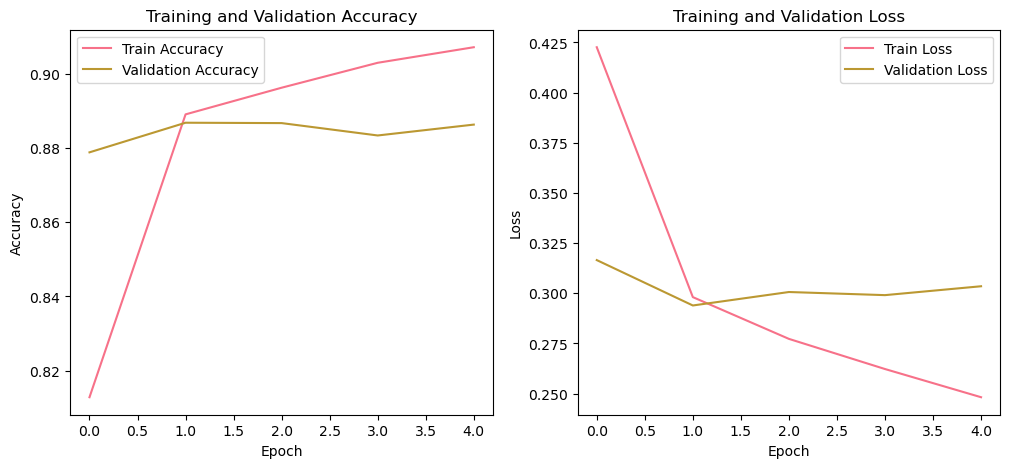

In [68]:
import matplotlib.pyplot as plt
# Plot/visualisasi akurasi & loss training & validation
plt.figure(figsize=(12, 5))
# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()